In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [2]:
reddit = pd.read_csv('reddit_data_example.csv')
reddit.head()

,Date,Domain,Sentiment,Language,Author,Thread Entry Type,Reddit Author Awardee Karma,Reddit Author Awarder Karma,Reddit Author Karma,Reddit Comments,Reddit Score,Reddit Score Upvote Ratio
0,2/9/2023 20:12,reddit.com,neutral,en,AutoModerator,reply,2397363,0,2000,NaN,1,NaN
1,2/9/2023 17:42,reddit.com,neutral,en,AutoModerator,reply,2397218,0,2000,NaN,1,NaN
2,2/9/2023 17:41,reddit.com,neutral,en,AutoModerator,reply,2397218,0,2000,NaN,1,NaN
3,2/8/2023 22:12,reddit.com,negative,en,KaylaST,reply,110,14,1470,NaN,1,NaN
4,2/8/2023 20:15,reddit.com,negative,en,CaveLady3000,post,311,73,4148,0.0,1,1.0


In [3]:
reddit.shape

(8137, 12)

In [4]:
reddit.columns

Index(['Date', 'Domain', 'Sentiment', 'Language', 'Author',
       'Thread Entry Type', 'Reddit Author Awardee Karma',
       'Reddit Author Awarder Karma', 'Reddit Author Karma', 'Reddit Comments',
       'Reddit Score', 'Reddit Score Upvote Ratio'],
      dtype='object')

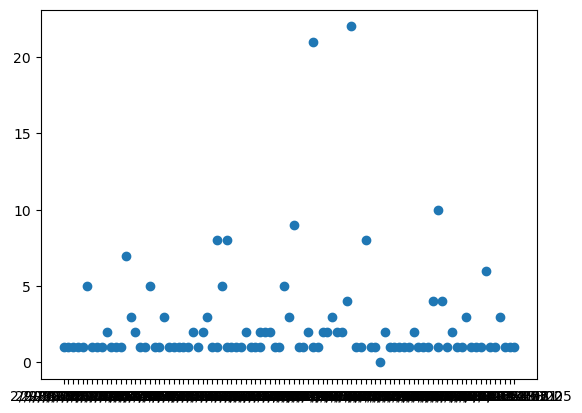

In [5]:
fig1, ax1 = plt.subplots()
ax1.scatter(reddit['Date'][0:100], reddit['Reddit Score'][0:100])

plt.show()

In [6]:
pd.to_datetime('2024-3-2')

Timestamp('2024-03-02 00:00:00')

In [7]:
reddit['datetime'] = pd.to_datetime(reddit['Date'])
reddit['datetime'].iloc[0:5]

0   2023-02-09 20:12:00
1   2023-02-09 17:42:00
2   2023-02-09 17:41:00
3   2023-02-08 22:12:00
4   2023-02-08 20:15:00
Name: datetime, dtype: datetime64[ns]

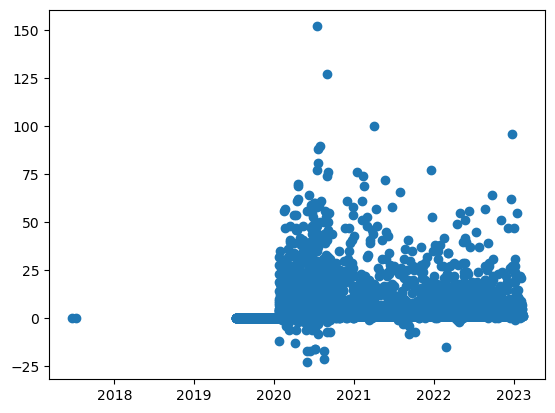

In [8]:
fig2, ax2 = plt.subplots()
ax2.scatter(reddit['datetime'], reddit['Reddit Score'])

plt.show()

In [9]:
reddit[reddit['datetime'] < pd.to_datetime('2019-01-01')]

,Date,Domain,Sentiment,Language,Author,Thread Entry Type,Reddit Author Awardee Karma,Reddit Author Awarder Karma,Reddit Author Karma,Reddit Comments,Reddit Score,Reddit Score Upvote Ratio,datetime
8135,7/8/2017 0:35,reddit.com,negative,en,#NAME?,post,0,0,0,0.0,0,NaN,2017-07-08 00:35:00
8136,6/20/2017 0:01,reddit.com,neutral,en,RaaaaeAnn,post,0,0,0,0.0,0,NaN,2017-06-20 00:01:00


In [10]:
(reddit['datetime'].min(), reddit['datetime'].max())

(Timestamp('2017-06-20 00:01:00'), Timestamp('2023-02-09 20:12:00'))

In [11]:
date_range = pd.date_range(start = '2017-06-20', end = '2023-02-09', freq='D')
date_range[0:10]

DatetimeIndex(['2017-06-20', '2017-06-21', '2017-06-22', '2017-06-23',
               '2017-06-24', '2017-06-25', '2017-06-26', '2017-06-27',
               '2017-06-28', '2017-06-29'],
              dtype='datetime64[ns]', freq='D')

In [12]:
reddit_count_by_day = reddit.groupby(reddit['datetime'].dt.date)['Reddit Score'].count()

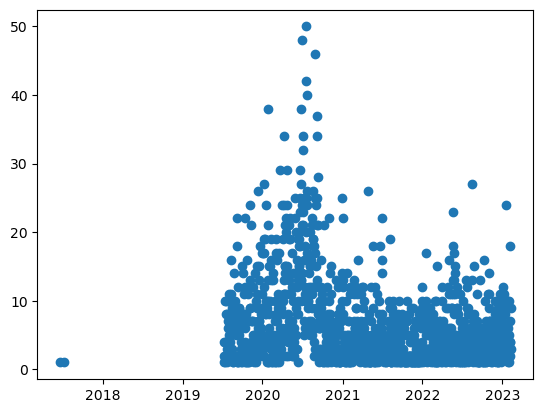

In [13]:
fig3, ax3 = plt.subplots()
ax3.scatter(reddit_count_by_day.index, reddit_count_by_day)
plt.show()

In [14]:
rds = pd.Series(reddit_count_by_day, index = date_range)
rds.head()

2017-06-20    1.0
2017-06-21    NaN
2017-06-22    NaN
2017-06-23    NaN
2017-06-24    NaN
Freq: D, Name: Reddit Score, dtype: float64

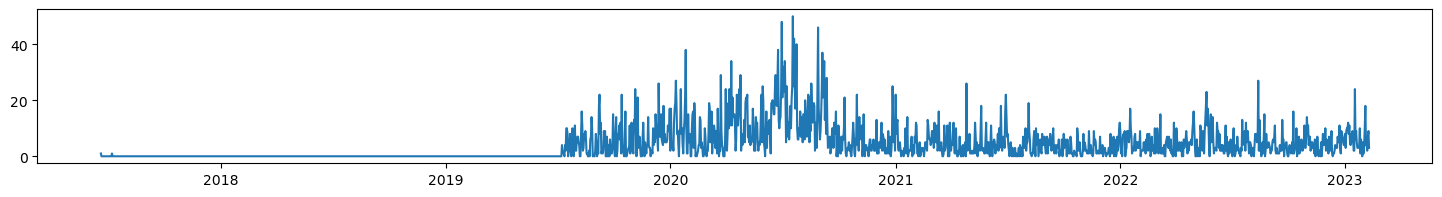

In [23]:
fig4, ax4 = plt.subplots(figsize=(18, 2))
ax4.plot(rds.index, rds.fillna(0))
plt.show()

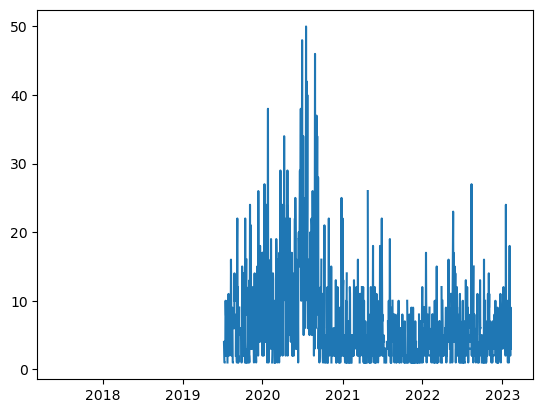

In [16]:
fig5, ax5 = plt.subplots()
ax5.plot(rds.index, rds)
plt.show()

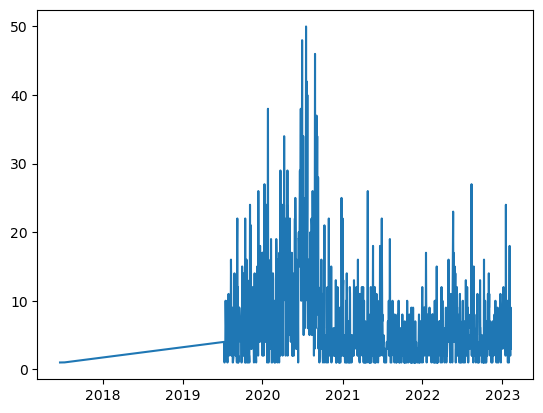

In [17]:
fig6, ax6 = plt.subplots()
ax6.plot(rds.index, rds.interpolate(method = 'time'))
plt.show()

In [21]:
# None. == np.nan
# reddit['datetime'].isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
8132    False
8133    False
8134    False
8135    False
8136    False
Name: datetime, Length: 8137, dtype: bool

In [ ]:
# '999' 'NaN'

In [30]:
rds.index.year == 2017

array([ True,  True,  True, ..., False, False, False])

In [31]:
rds[rds.index.year == 2017]

2017-06-20    1.0
2017-06-21    NaN
2017-06-22    NaN
2017-06-23    NaN
2017-06-24    NaN
             ... 
2017-12-27    NaN
2017-12-28    NaN
2017-12-29    NaN
2017-12-30    NaN
2017-12-31    NaN
Freq: D, Name: Reddit Score, Length: 195, dtype: float64

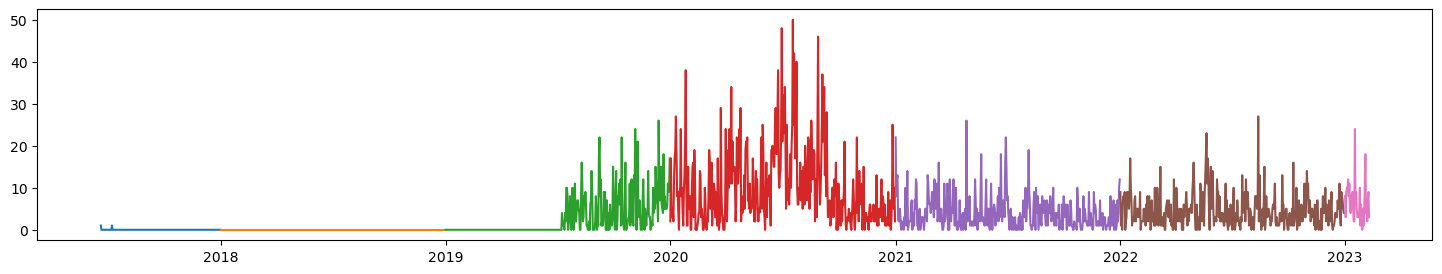

In [37]:
rds2017 = rds[rds.index.year == 2017]
rds2018 = rds[rds.index.year == 2018]
rds2019 = rds[rds.index.year == 2019]
rds2020 = rds[rds.index.year == 2020]
rds2021 = rds[rds.index.year == 2021]
rds2022 = rds[rds.index.year == 2022]
rds2023 = rds[rds.index.year == 2023]

fig7, ax7 = plt.subplots(figsize = (18, 3))
ax7.plot(rds2017.index, rds2017.fillna(0))
ax7.plot(rds2018.index, rds2018.fillna(0))
ax7.plot(rds2019.index, rds2019.fillna(0))
ax7.plot(rds2020.index, rds2020.fillna(0))
ax7.plot(rds2021.index, rds2021.fillna(0))
ax7.plot(rds2022.index, rds2022.fillna(0))
ax7.plot(rds2023.index, rds2023.fillna(0))
plt.show()

In [44]:
date_range_month = pd.date_range(start = '2017-06-20', end = '2023-02-09', freq='ME')
date_range_month

DatetimeIndex(['2017-06-30', '2017-07-31', '2017-08-31', '2017-09-30',
               '2017-10-31', '2017-11-30', '2017-12-31', '2018-01-31',
               '2018-02-28', '2018-03-31', '2018-04-30', '2018-05-31',
               '2018-06-30', '2018-07-31', '2018-08-31', '2018-09-30',
               '2018-10-31', '2018-11-30', '2018-12-31', '2019-01-31',
               '2019-02-28', '2019-03-31', '2019-04-30', '2019-05-31',
               '2019-06-30', '2019-07-31', '2019-08-31', '2019-09-30',
               '2019-10-31', '2019-11-30', '2019-12-31', '2020-01-31',
               '2020-02-29', '2020-03-31', '2020-04-30', '2020-05-31',
               '2020-06-30', '2020-07-31', '2020-08-31', '2020-09-30',
               '2020-10-31', '2020-11-30', '2020-12-31', '2021-01-31',
               '2021-02-28', '2021-03-31', '2021-04-30', '2021-05-31',
               '2021-06-30', '2021-07-31', '2021-08-31', '2021-09-30',
               '2021-10-31', '2021-11-30', '2021-12-31', '2022-01-31',
      